10가지 의류(0~9)를 예측하는 다중 분류 문제

데이터 준비하기

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


데이터 그려보기

In [3]:
print(x_train[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

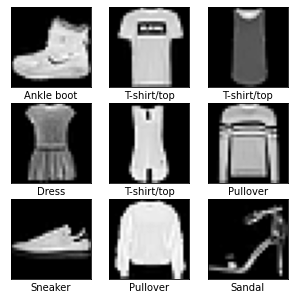

In [4]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

# Fashion-MNIST의 레이블에 해당하는 품목입니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위에서 무작위로 9개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

전처리 및 검증 데이터셋 만들기

In [5]:
# 값의 범위를 0~1 사이로 만들기 -> 스케일링 -> minmax 알고리즘

x_train = x_train /255
x_test = x_test /255

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [6]:
# 레이블 (정답지) 범주형 데이터로 변경
from tensorflow.keras.utils import to_categorical

# 실제 정답 비교를 위해 0-9 정답지 따로 저장
real_y_test = y_test

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)

In [7]:
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 7:3 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,
                                                  test_size=0.3,
                                                  random_state=777)

첫 번째 모델 구성하기

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()

first_model.add(Flatten(input_shape=(28,28))) #Flatten(28, 28)함수 -> .(28 * 28) -> 1차원 784로 변환
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

첫 번째 모델 설정하기

In [9]:
first_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

첫 번째 모델 학습하기

In [10]:
first_history = first_model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.7280 - accuracy: 0.7608 - val_loss: 0.5039 - val_accuracy: 0.8286
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4802 - accuracy: 0.8350 - val_loss: 0.4426 - val_accuracy: 0.8512
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4370 - accuracy: 0.8479 - val_loss: 0.4304 - val_accuracy: 0.8527
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4163 - accuracy: 0.8550 - val_loss: 0.4104 - val_accuracy: 0.8579
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3961 - accuracy: 0.8614 - val_loss: 0.4164 - val_accuracy: 0.8533
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3840 - accuracy: 0.8658 - val_loss: 0.3856 - val_accuracy: 0.8654
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3689 - accuracy: 0.8701 - val_loss: 0.3781 - val_accuracy: 0.8682
Epoch 

두 번째 모델 구성하기

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

second_model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
second_model.add(Flatten(input_shape=(28,28))) #Flatten(28, 28)함수 -> .(28 * 28) -> 1차원 784로 변환
second_model.add(Dense(128, activation='relu')) # 128개의 출력을 가지는 Dense 층을 추가합니다. <- 기존 모델보다 층 하나 더 추가
second_model.add(Dense(64, activation='relu')) # 64개의 출력을 가지는 Desne 층
second_model.add(Dense(32, activation='relu')) # 32개의 출력을 가지는 Desne 층
second_model.add(Dense(10, activation='softmax')) # 10개의 출력을 가지는 신경망

second_model.compile(optimizer='adam', # 옵티마이져 : Adam
              loss='categorical_crossentropy', # 손실 함수 : categorical_crossentropy
              metrics=['accuracy']) # 모니터링 할 평가지표 : acc(정확도)


second_history = second_model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 6ms/step - loss: 0.6149 - accuracy: 0.7878 - val_loss: 0.4790 - val_accuracy: 0.8339
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4151 - accuracy: 0.8512 - val_loss: 0.4324 - val_accuracy: 0.8523
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3707 - accuracy: 0.8659 - val_loss: 0.3735 - val_accuracy: 0.8649
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3433 - accuracy: 0.8750 - val_loss: 0.3466 - val_accuracy: 0.8745
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3229 - accuracy: 0.8809 - val_loss: 0.3465 - val_accuracy: 0.8734
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3078 - accuracy: 0.8876 - val_loss: 0.3521 - val_accuracy: 0.8696
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.2968 - accuracy: 0.8910 - val_loss: 0.3322 - val_accuracy: 0.8802
Epoch 

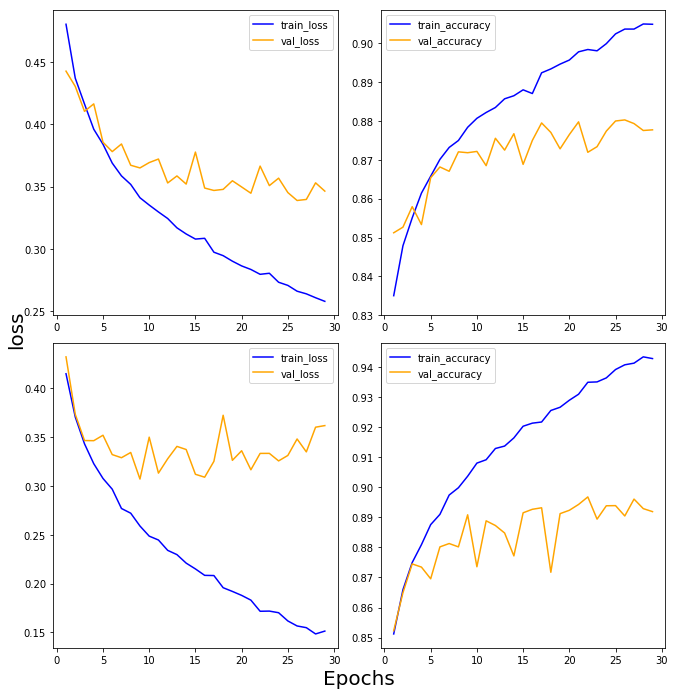

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], 
                     color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], 
                     color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(first_history, second_history, 30)


모델 평가하기

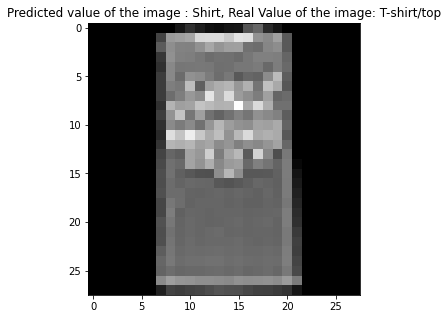

In [13]:
import numpy as np

results = first_model.predict(x_test)
np.set_printoptions(precision=7) # numpy 소수점 제한

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.

import matplotlib.pyplot as plt

sample_size = 10
# 0 ~ 9999의 범위에서 무작위로 정수를 뽑습니다.
random_idx = np.random.randint(10000) 

plt.figure(figsize = (5, 5))
plt.imshow(x_test[random_idx], cmap = 'gray')
plt.title('Predicted value of the image : ' 
          + class_names[arg_results[random_idx]] 
          + ', Real Value of the image: '+class_names[real_y_test[random_idx]])
plt.show()